In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


In [2]:
df = pd.read_csv('../input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


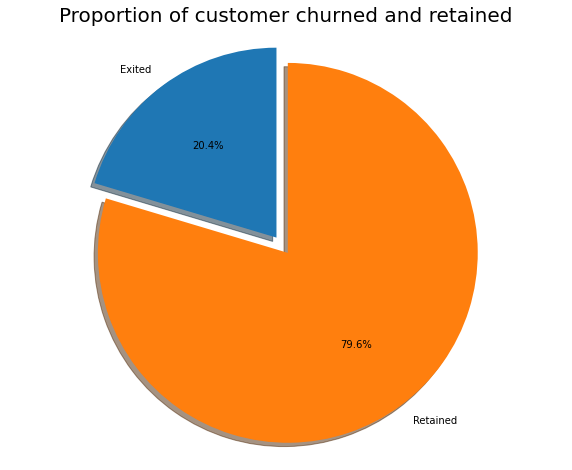

In [3]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='Geography', ylabel='Exited'>

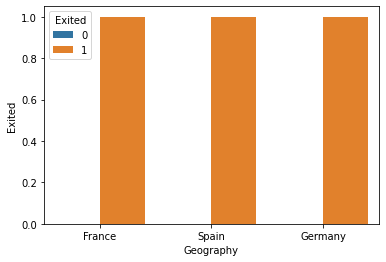

In [4]:
sns.barplot(x='Geography',
    y='Exited',
    hue='Exited',
    data=df,)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

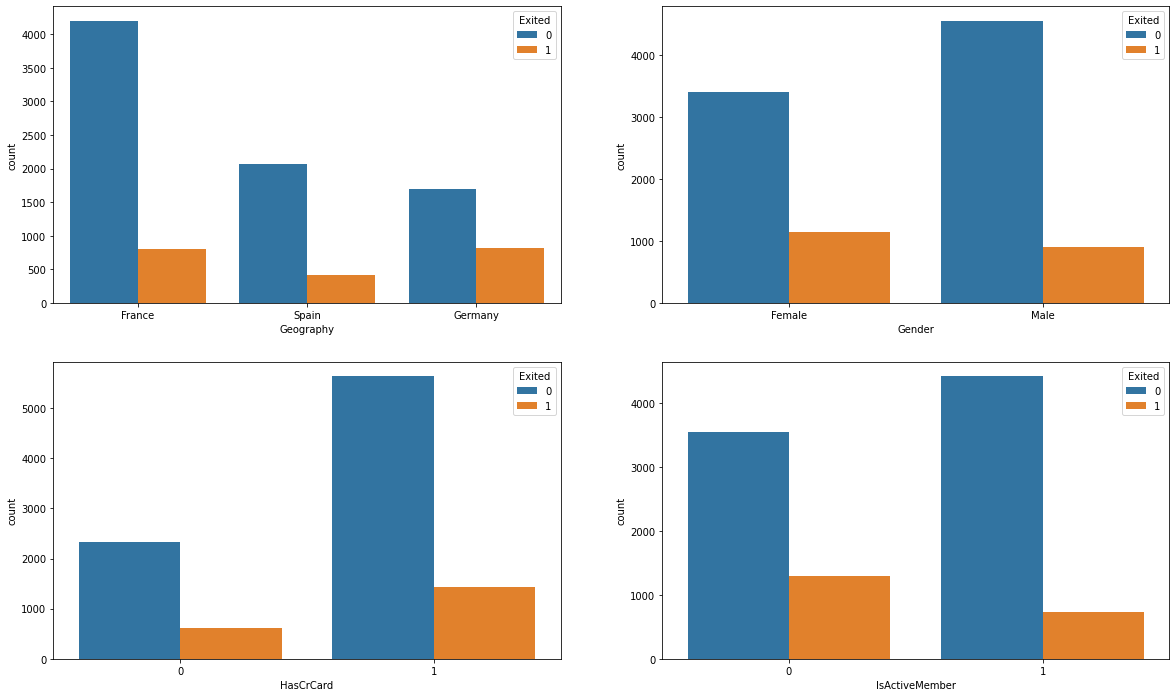

In [5]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

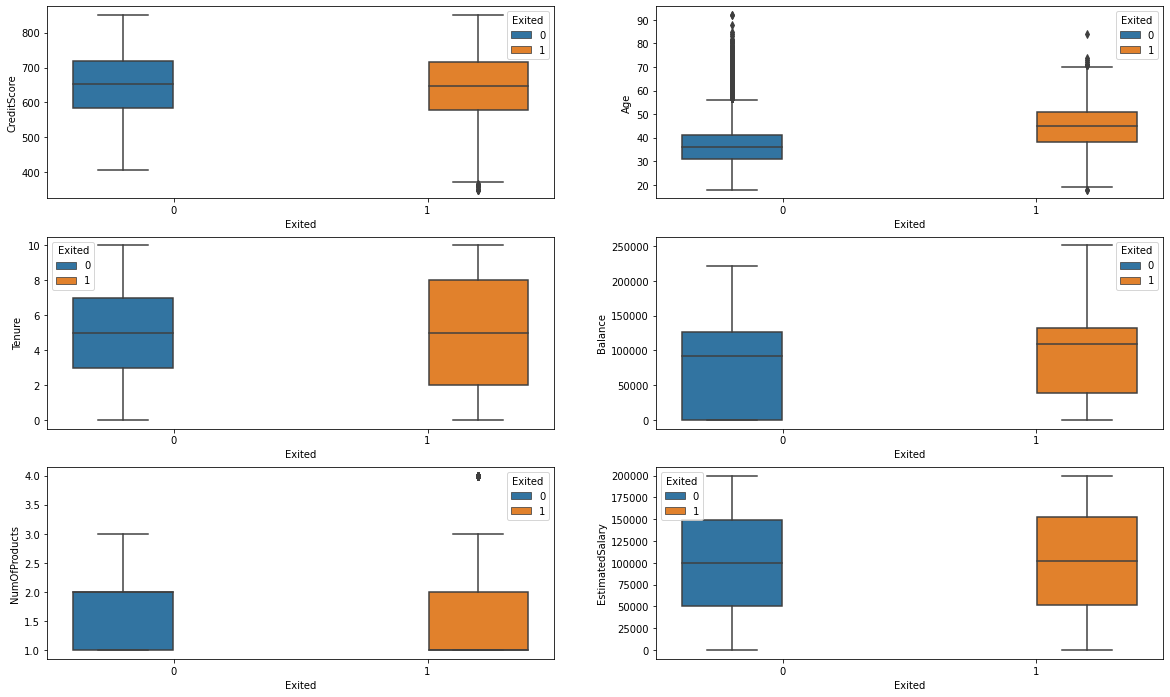

In [6]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [7]:
df.drop(['Surname','CustomerId','RowNumber'],axis=1,inplace=True)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


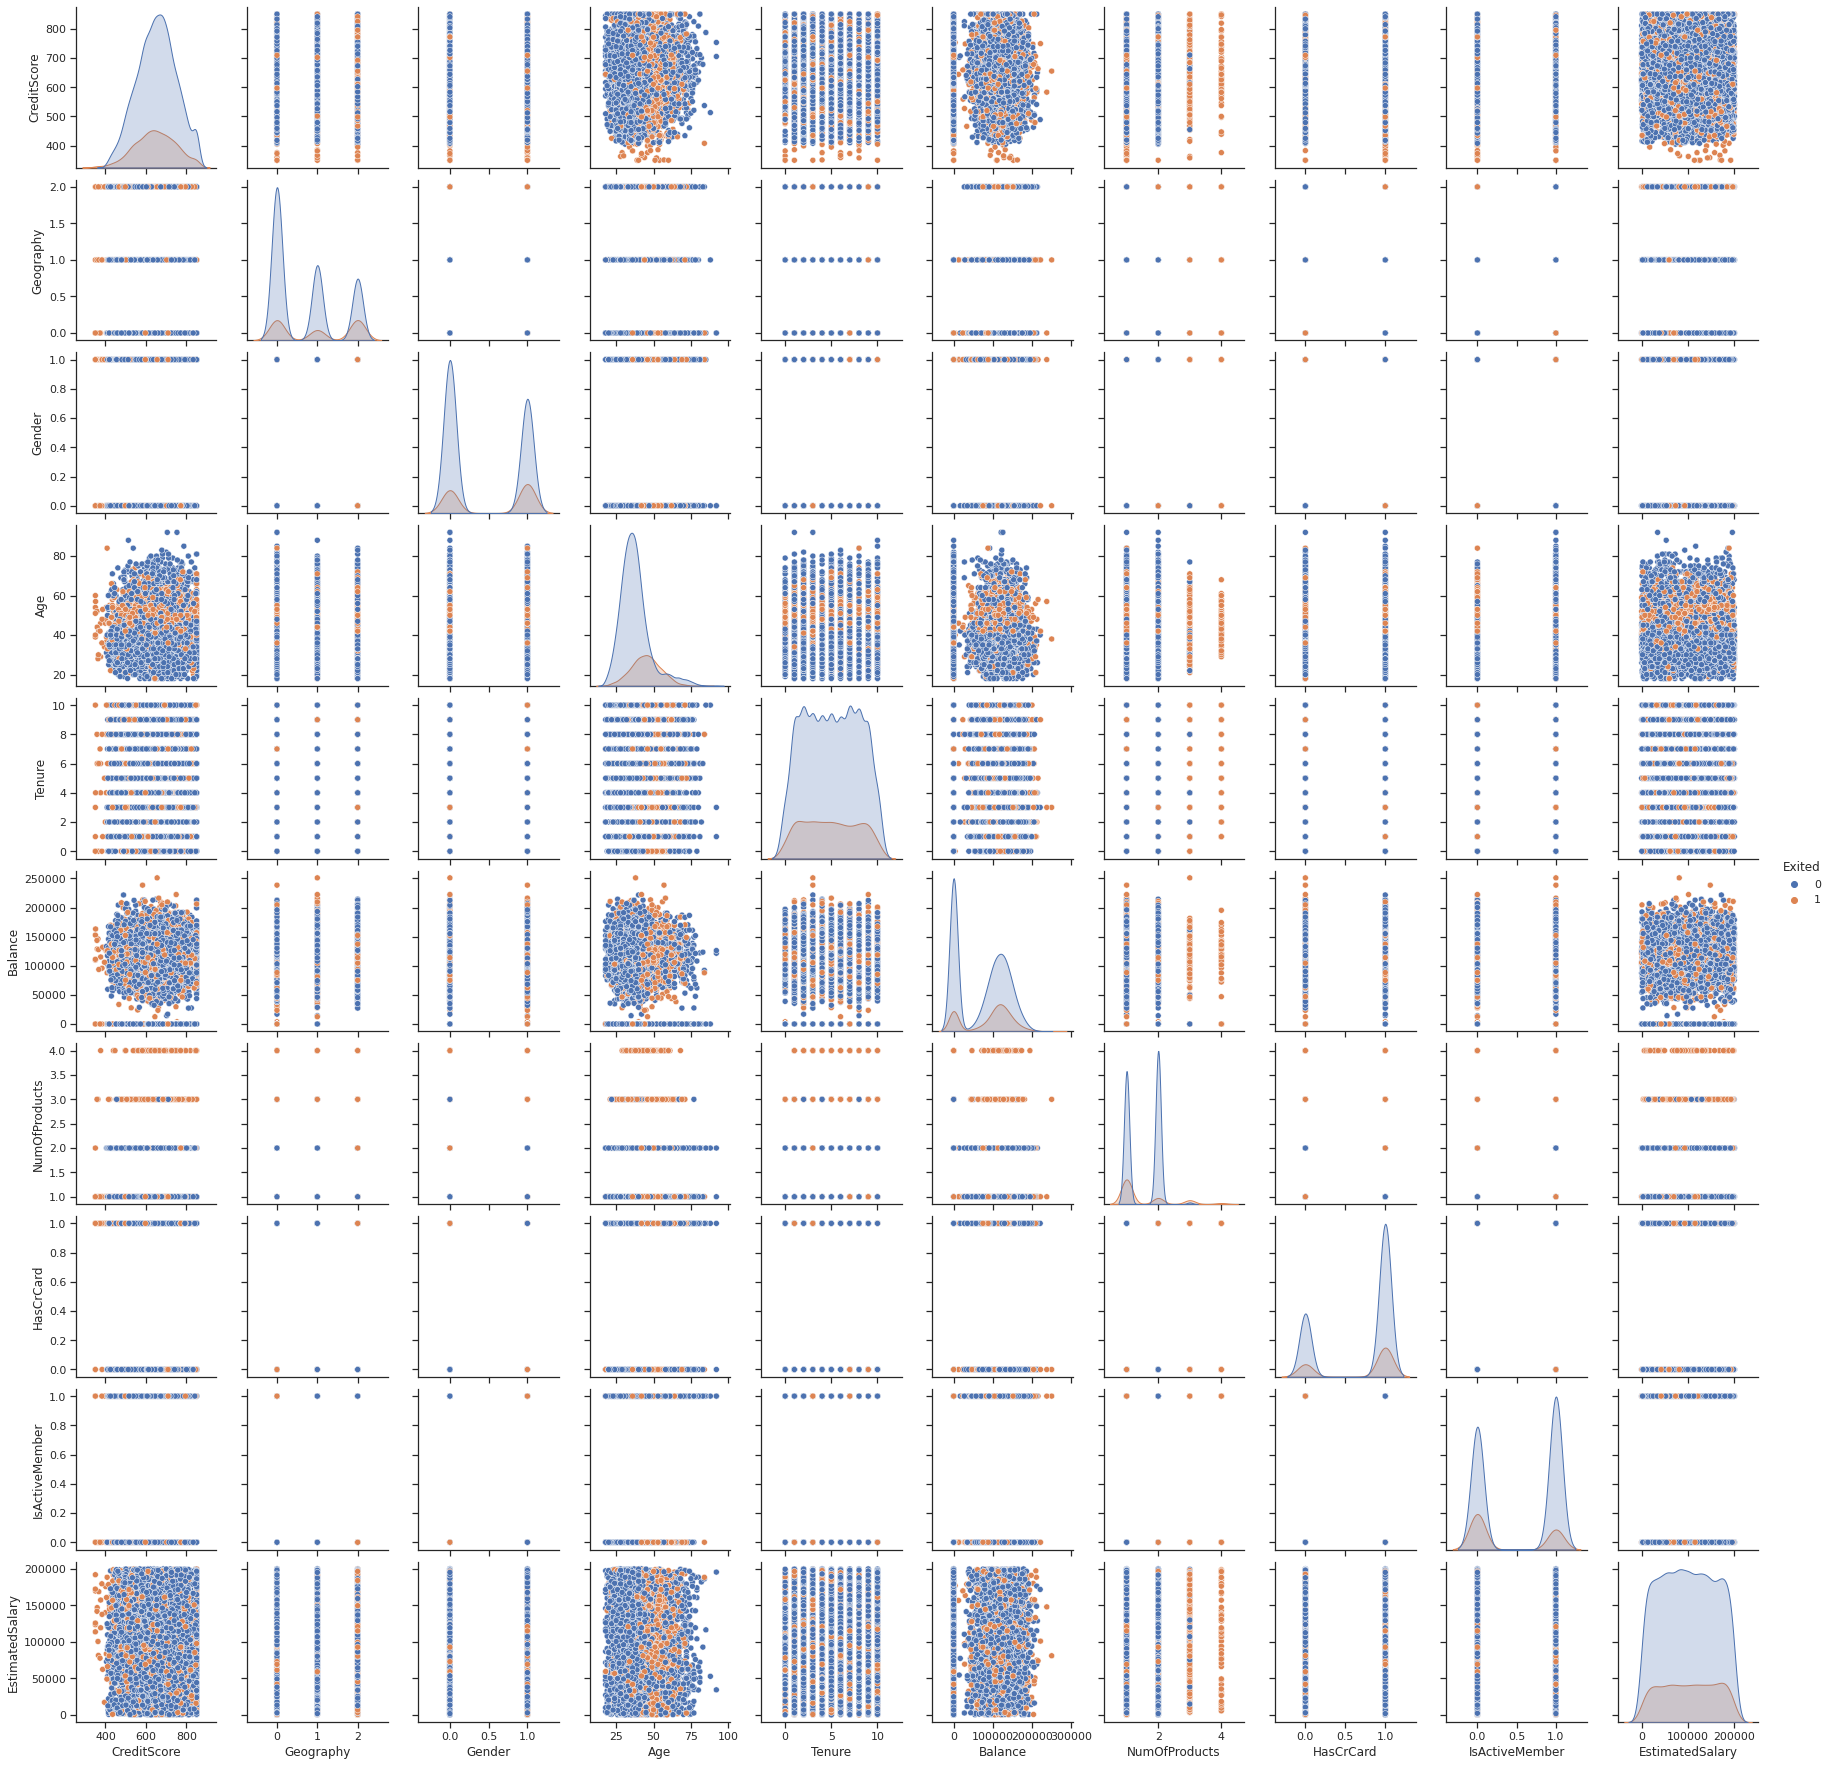

In [11]:

import seaborn as sns
sns.set_theme(style="ticks")


sns.pairplot(df, hue="Exited")

<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

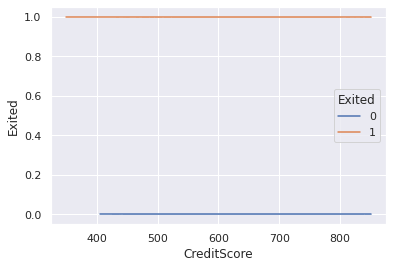

In [12]:
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="CreditScore", y="Exited",
             hue="Exited", 
             data=df)

In [13]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


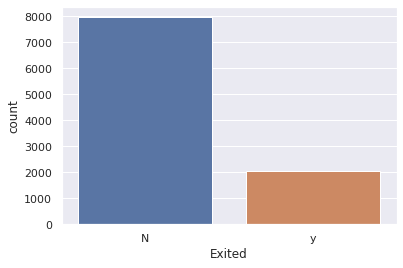

In [15]:
# visualize the target variable
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.countplot(df['Exited'])
g.set_xticklabels(['N','y'])
plt.show()

In [16]:
y=df['Exited']
X=df.drop(['Exited','NumOfProducts'],axis=1)

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,101348.88
1,608,1,1,41,1,83807.86,0,1,112542.58
2,502,0,1,42,8,159660.80,1,0,113931.57
3,699,0,1,39,1,0.00,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,79084.10


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [19]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X1, y1 = smote.fit_resample(X, y)

print('Original dataset shape', y.value_counts())
print('Resample dataset shape', y1.value_counts())

Original dataset shape 0    7963
1    2037
Name: Exited, dtype: int64
Resample dataset shape 1    7963
0    7963
Name: Exited, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


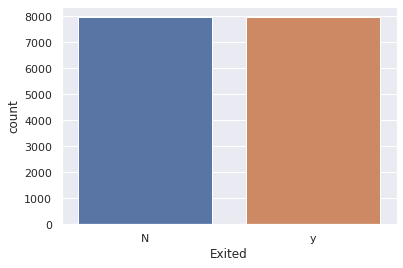

In [20]:
g = sns.countplot(y1)
g.set_xticklabels(['N','y'])
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)



In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)


In [23]:
X_train1

array([[-1.4800025 , -0.90071709, -0.82668241, ..., -1.28937463,
        -0.7593007 , -1.07685499],
       [ 0.99227873, -0.90071709, -0.82668241, ..., -1.28937463,
        -0.7593007 ,  1.26503767],
       [ 1.84933622,  1.5276261 , -0.82668241, ...,  0.77556978,
         1.31700128, -1.00365562],
       ...,
       [-0.54602959,  1.5276261 ,  1.20965438, ...,  0.77556978,
        -0.7593007 ,  0.97389888],
       [ 0.66264123, -0.90071709,  1.20965438, ...,  0.77556978,
        -0.7593007 , -0.75680128],
       [ 0.25608832,  1.5276261 , -0.82668241, ...,  0.77556978,
        -0.7593007 , -1.72595735]])

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def accuracy(model):
    model.fit(X_train1, y_train)
    predict = model.predict(X_test1)
    return y_test, predict

In [25]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier

model1 = XGBClassifier()
model2 = RandomForestClassifier()
model3 = SVC()
model4 = LogisticRegression()
model5 = KNeighborsClassifier()
model6 = SGDClassifier()
model7 = DecisionTreeClassifier()
model8 = GaussianNB()
model9 = SVC()
model10= AdaBoostClassifier()
#model11=AdaBoostClassifier()
    
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9,model10]
i=0

for model in models:
    i+=1
    y_test, predict=accuracy(model)
    print("Model ", i,":", model)
    print('Accuracy score:',accuracy_score(y_test, predict))
    print('F1 score:',f1_score(y_test, predict))
        
              

Model  1 : XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score: 0.8236032642812304
F1 score: 0.8219264892268694
Model  2 : RandomForestClassifier()
Accuracy score: 0.8311362209667295
F1 score: 0.8280051150895141
Model  3 : SVC()
Accuracy score: 0.7831136220966729
F1 score: 0.7765923052053022
Model  4 : LogisticRegression()
Accuracy scor

In [26]:
rf= RandomForestClassifier()
hist=rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[1354  251]
 [ 293 1288]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1605
           1       0.84      0.81      0.83      1581

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



<AxesSubplot:>

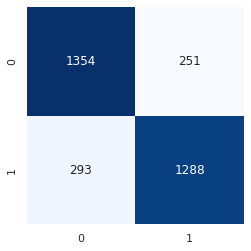

In [28]:
conf_mat=confusion_matrix(y_test, predict)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


In [29]:
y_train.unique()

array([1, 0])

In [30]:
import pickle
 
pickle.dump(rf, open('model.pkl', 'wb'))


In [31]:
pickled_model = pickle.load(open('./model.pkl', 'rb'))
pickled_model.predict(X_test)

array([0, 1, 1, ..., 0, 0, 1])